<a href="https://colab.research.google.com/github/walid101/TicTacToe_RL/blob/master/ImageColorizerColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **<font color='blue'> Artistic Colorizer </font>**

#◢ DeOldify - Colorize your own photos!

####**Credits:**

Special thanks to:

Jason Antic for creating the DeOldify for training and inferencing.

Matt Robinson and María Benavente for pioneering the DeOldify image colab notebook.  

Dana Kelley for doing things, breaking stuff & having an opinion on everything.



---


#◢ Verify Correct Runtime Settings

**<font color='#FF000'> IMPORTANT </font>**

In the "Runtime" menu for the notebook window, select "Change runtime type." Ensure that the following are selected:
* Runtime Type = Python 3
* Hardware Accelerator = GPU


In [1]:
import torch

if not torch.cuda.is_available():
    print('GPU not available.')

#◢ Git clone and install DeOldify

In [2]:
!git clone https://github.com/Dakini/AnimeColorDeOldify.git DeOldify

fatal: destination path 'DeOldify' already exists and is not an empty directory.


In [3]:
cd DeOldify

/content/DeOldify


#◢ Setup

In [4]:
!pip install -r colab_requirements.txt

In [5]:
# Downgrade protobuf to fix compatibility issues
!pip install protobuf<3.20.*

/bin/bash: line 1: 3.20.*: No such file or directory


In [6]:
# Fix the import issue
import sys
import collections
if not hasattr(collections, 'Iterable'):
    collections.Iterable = collections.abc.Iterable

# Now try importing again
import fastai
from deoldify.visualize import *

torch.backends.cudnn.benchmark = True

In [7]:
!mkdir 'models'
!wget https://www.dropbox.com/s/0m1rwdk7je1r39j/MQT9QHUfXxKpQ9b2CPda89htDBzFtmHD9r2YZsHp.pth?dl=0 -O ./models/ColorizeArtistic_gen.pth

--2025-04-18 22:34:59--  https://www.dropbox.com/s/0m1rwdk7je1r39j/MQT9QHUfXxKpQ9b2CPda89htDBzFtmHD9r2YZsHp.pth?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/6gqv8pw57gsx74md3g1v8/MQT9QHUfXxKpQ9b2CPda89htDBzFtmHD9r2YZsHp.pth?rlkey=ue5mg79a62meskktdrgm88iyv&dl=0 [following]
--2025-04-18 22:35:00--  https://www.dropbox.com/scl/fi/6gqv8pw57gsx74md3g1v8/MQT9QHUfXxKpQ9b2CPda89htDBzFtmHD9r2YZsHp.pth?rlkey=ue5mg79a62meskktdrgm88iyv&dl=0
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc8b0aae236a5aa5aa1401b55250.dl.dropboxusercontent.com/cd/0/inline/CoHtXf9BGXPm9baUbZ13_fGjIusws2a0izZw_36HowspdFJVsGobGKEvcWNnrLSJD5fzwPSeV8CzCajwGWY3D13lKANbr44qnZ8Lp9_GcbRpzoezEz3XoKFArVEpBlZpp1AFIpiD1O9T7YpAIhT2LQEi/file#

In [8]:
stats = ([0.7137, 0.6628, 0.6519],[0.2970, 0.3017, 0.2979])

In [12]:
# Fix all the missing collections attributes
import collections
import collections.abc

for type_name in ['Iterable', 'Sized', 'Mapping', 'MutableMapping', 'MutableSequence', 'Sequence']:
    if not hasattr(collections, type_name):
        setattr(collections, type_name, getattr(collections.abc, type_name))

original_torch_load = torch.load
torch.load = lambda f, *args, **kwargs: original_torch_load(f, *args, **{**kwargs, 'weights_only': False})

# Now try loading the colorizer again
colorizer = get_image_colorizer(artistic=True,stats=stats)

#◢ Instructions

### source_url
Type in a url to a direct link of an image.  Usually that means they'll end in .png, .jpg, etc. NOTE: If you want to use your own image, upload it first to a site like Imgur.

### render_factor
The default value of 12 has been carefully chosen and should work -ok- for most scenarios (but probably won't be the -best-). This determines resolution at which the color portion of the image is rendered. Lower resolution will render faster, and colors also tend to look more vibrant. Older and lower quality images in particular will generally benefit by lowering the render factor. Higher render factors are often better for higher quality images, but the colors may get slightly washed out.

### watermarked
Selected by default, this places a watermark icon of a palette at the bottom left corner of the image.  This is intended to be a standard way to convey to others viewing the image that it is colorized by AI. We want to help promote this as a standard, especially as the technology continues to improve and the distinction between real and fake becomes harder to discern. This palette watermark practice was initiated and lead by the company MyHeritage in the MyHeritage In Color feature (which uses a newer version of DeOldify than what you're using here).

### post_process
Selected by default, this outputs the image without being postprocessed. The post processing usually works really well for images that contain some shading, however it does not work for images that are mainly line drawings (sketches). It is recommended to turn this off, if you are colorising a sketch.

#### How to Download a Copy
Simply right click on the displayed image and click "Save image as..."!

## Pro Tips

You can evaluate how well the image is rendered at each render_factor by using the code at the bottom (that cell under "See how well render_factor values perform on a frame here").

## Troubleshooting
If you get a 'CUDA out of memory' error, you probably have the render_factor too high.

#◢ Colorize!!

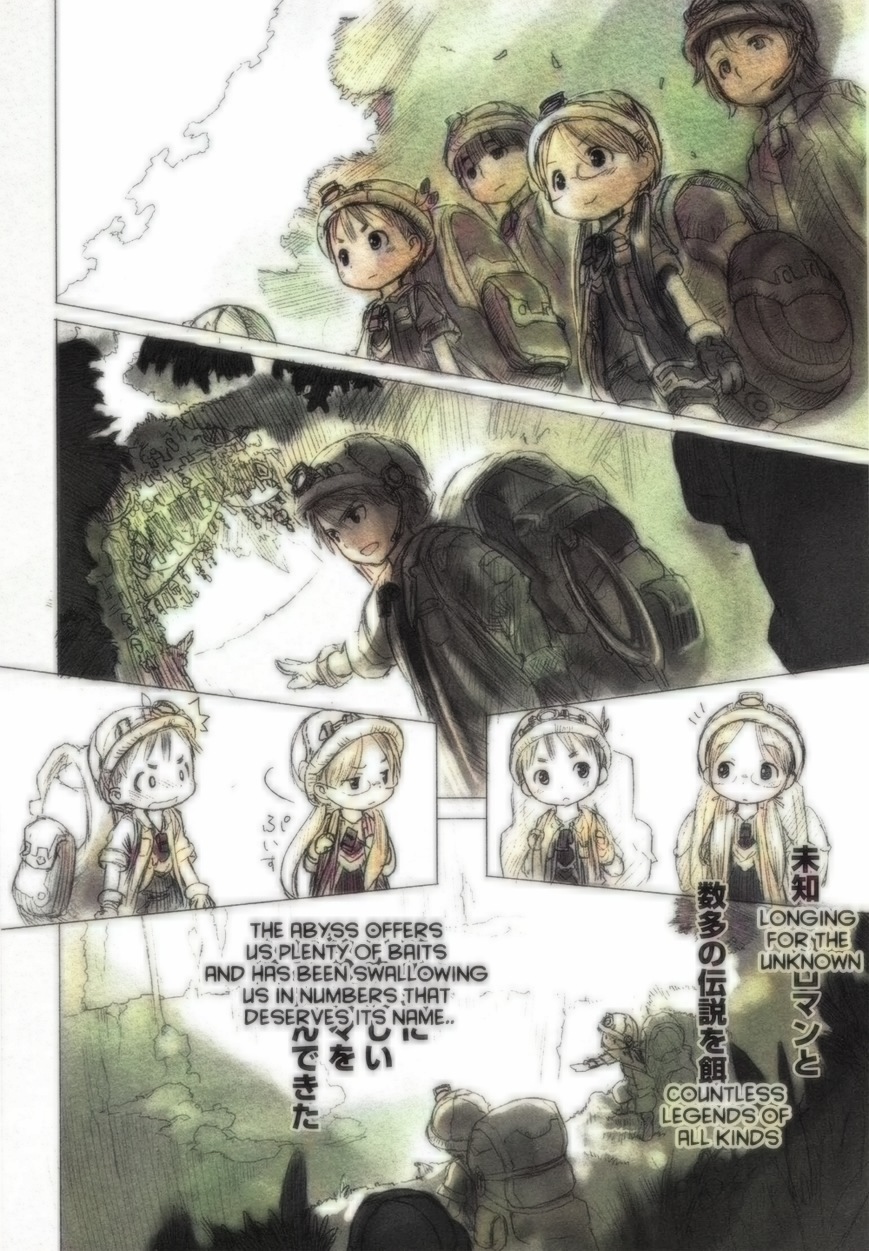

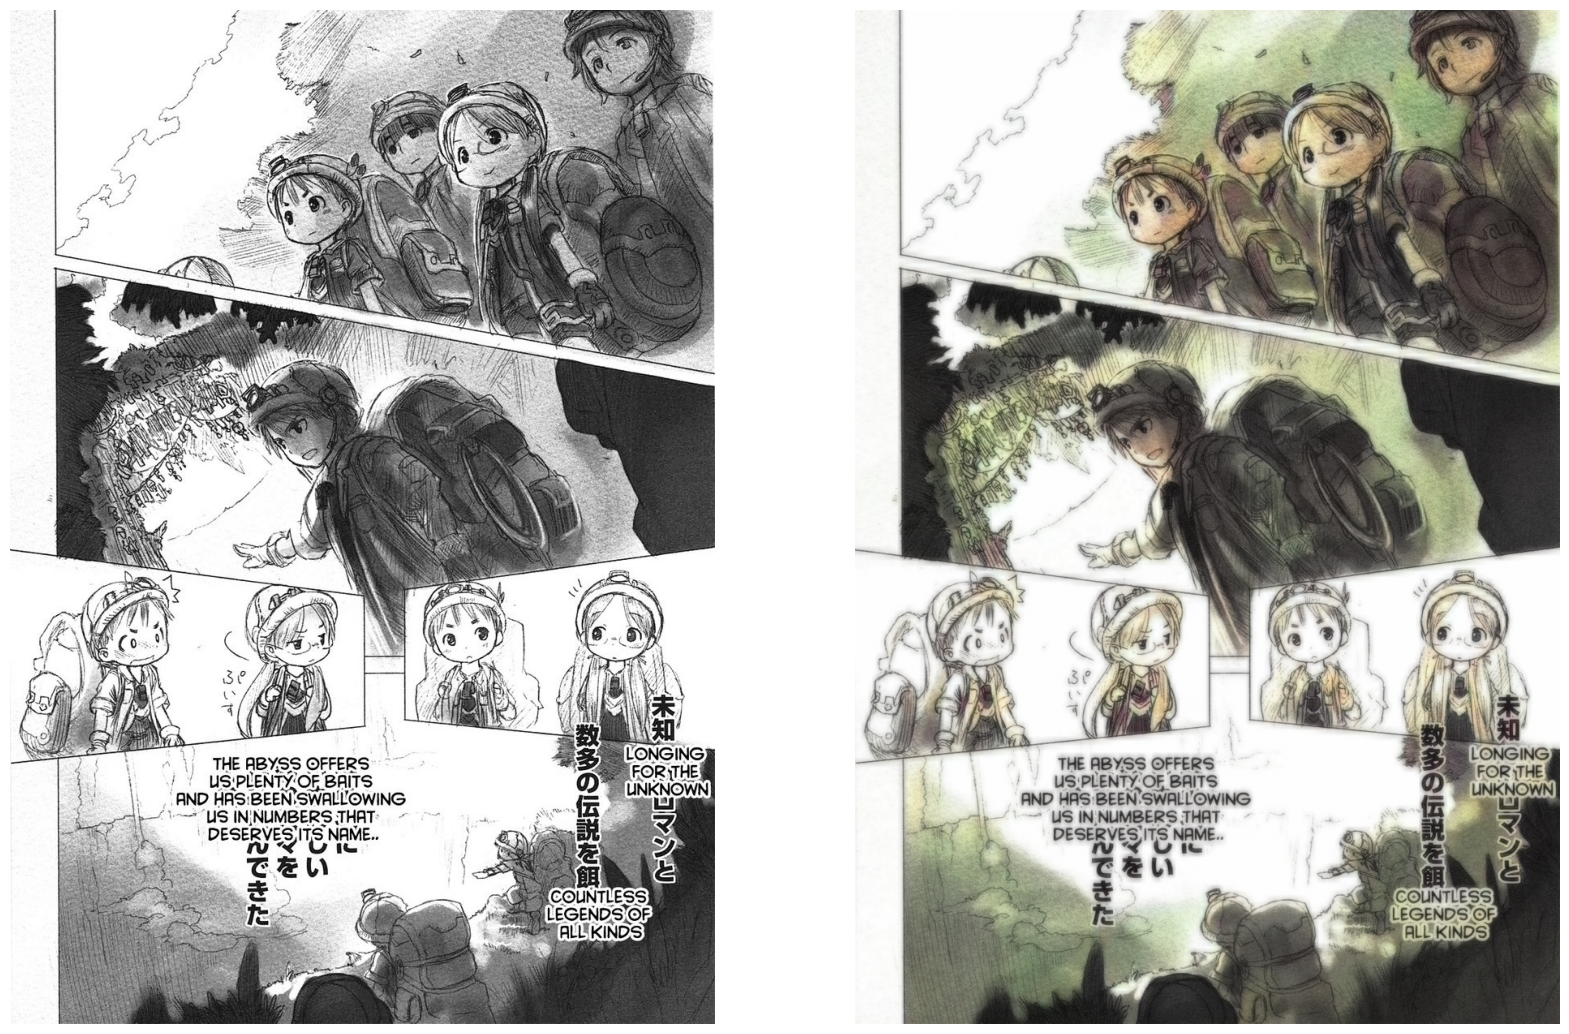

In [14]:
source_url = 'https://cmdxd98sb0x3yprd.mangadex.network/data/b4a19c73bbc9bef2feb86de24969d21f/x15-1f23e18a9271931f6d2e5290858f826a01004719a5dadab3e0e4d71384a9164c.jpg' # 'https://i.imgur.com/jUCRFJE.png' #@param {type:"string"}
render_factor = 12 #@param {type:"slider", min:7, max:45, step:1}
watermarked = False #@param {type:"boolean"}

if source_url is not None and source_url !='':
    image_path = colorizer.plot_transformed_image_from_url(url=source_url, render_factor=render_factor, compare=True, post_process=False, watermarked=watermarked)
    show_image_in_notebook(image_path)
else:
    print('Provide an image url and try again.')

## See how well render_factor values perform on the image here

In [ ]:
for i in range(10,45,2):
    colorizer.plot_transformed_image('test_images/5694_.png', render_factor=i, display_render_factor=True, post_process=True, figsize=(8,8))